In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

Initial Questions
1. Distribution of redemption status with respect to coupon, customer and campaign?
2. What is the trend in the campaign duration?
3. How many customers whose information is not present?
4. What is the trend in the Customer transactions?

### Redemptions

In [47]:
trainset = pd.read_csv(r"Data\train.csv", index_col='id')
trainset.head()

,campaign_id,coupon_id,customer_id,redemption_status
id,,,,
1,13,27,1053,0
2,13,116,48,0
6,9,635,205,0
7,13,644,1050,0
9,8,1017,1489,0


In [48]:
# Compute total redemptions per coupon
coupon_redemption_freq = trainset[trainset["redemption_status"] == 1].groupby("coupon_id").size().reset_index(name="redemption_count")

# Compute total times each coupon was issued
coupon_total_count = trainset.groupby("coupon_id").size().reset_index(name="total_issued")

# Merge both dataframes
coupon_popularity = pd.merge(coupon_redemption_freq, coupon_total_count, on="coupon_id", how="right").fillna(0)

# Calculate redemption rate (percentage)
coupon_popularity["redemption_rate"] = (coupon_popularity["redemption_count"] / coupon_popularity["total_issued"]) * 100

# Sort by highest redemption rate
coupon_popularity = coupon_popularity.sort_values(by="redemption_rate", ascending=False)

# Display result
print(coupon_popularity.head())

# Save as CSV for visualization in PPT
coupon_popularity.to_csv("coupon_popularity.csv", index=False)


     coupon_id  redemption_count  total_issued  redemption_rate
441        586              18.0           127        14.173228
577        754              36.0           302        11.920530
501        661              14.0           119        11.764706
8            9              14.0           120        11.666667
20          21              14.0           136        10.294118


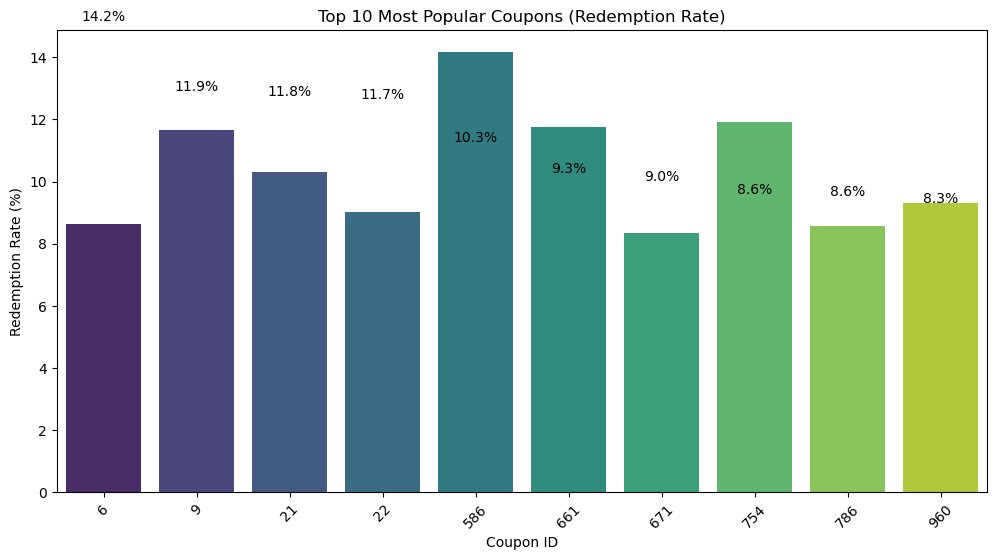

In [49]:
coupon_popularity = pd.read_csv("coupon_popularity.csv")

# Sort by redemption rate (optional: show top 10 most popular coupons)
coupon_popularity = coupon_popularity.sort_values(by="redemption_rate", ascending=False).head(10)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=coupon_popularity, x="coupon_id", y="redemption_rate", palette="viridis")

# Customize Labels
plt.xlabel("Coupon ID")
plt.ylabel("Redemption Rate (%)")
plt.title("Top 10 Most Popular Coupons (Redemption Rate)")
plt.xticks(rotation=45)

# Show percentage values on bars
for index, row in coupon_popularity.iterrows():
    plt.text(index, row["redemption_rate"] + 1, f"{row['redemption_rate']:.1f}%", ha="center", fontsize=10)

# Show Plot
plt.show()


In [50]:
group_by_redemption = trainset.groupby('redemption_status').agg({'coupon_id': 'nunique', 'customer_id': 'nunique', 'redemption_status': 'count'})
group_by_redemption.columns = ['coupons', 'customers', 'count']
group_by_redemption = group_by_redemption.reset_index()
group_by_redemption

,redemption_status,coupons,customers,count
0,0,866,1428,77640
1,1,239,247,729


#### here we can see that dataset imbalanced

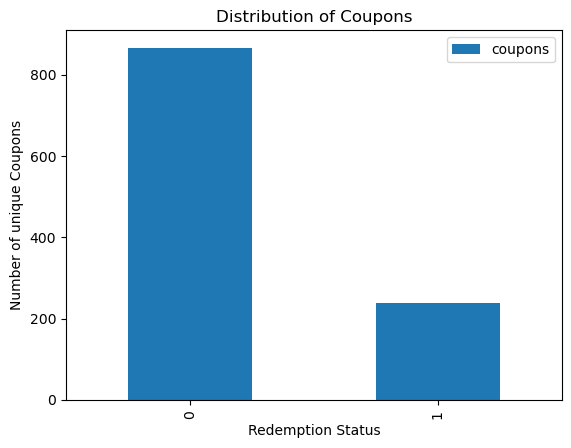

In [51]:
group_by_redemption.plot('redemption_status', 'coupons', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of unique Coupons")
_ = plt.title("Distribution of Coupons")
plt.show()

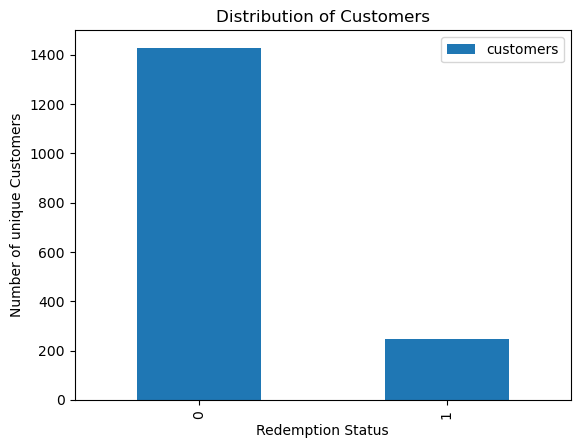

In [52]:
group_by_redemption.plot('redemption_status', 'customers', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of unique Customers")
_ = plt.title("Distribution of Customers")

plt.show()

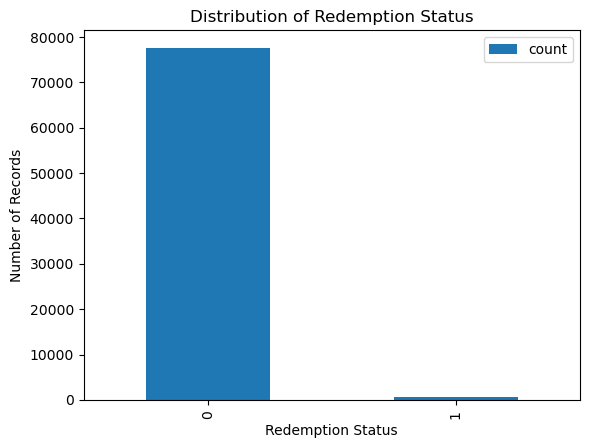

In [53]:
group_by_redemption.plot('redemption_status', 'count', kind='bar')
_ = plt.xlabel("Redemption Status")
_ = plt.ylabel("Number of Records")
_ = plt.title("Distribution of Redemption Status")
plt.show()

Below are the findings from the above distributions
1. There are 627 coupons which are not redeemed by any customers
2. There are 1181 customers who has not redeemed any coupons
3. The data is highly Imbalanced

### Campaigns

In [54]:
campaign_data = pd.read_csv('Data\campaign_data.csv', parse_dates=['start_date', 'end_date'], dayfirst=True)
campaign_data['duration'] = (campaign_data['end_date'] - campaign_data['start_date']).dt.days
campaign_data = campaign_data.sort_values('start_date')
campaign_data.head()

C:\Users\sahil\AppData\Local\Temp\ipykernel_12112\3678826105.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  campaign_data = pd.read_csv('Data\campaign_data.csv', parse_dates=['start_date', 'end_date'], dayfirst=True)
C:\Users\sahil\AppData\Local\Temp\ipykernel_12112\3678826105.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  campaign_data = pd.read_csv('Data\campaign_data.csv', parse_dates=['start_date', 'end_date'], dayfirst=True)


,campaign_id,campaign_type,start_date,end_date,duration
27,26,X,2012-08-12,2012-09-21,40
26,27,Y,2012-08-25,2012-10-27,63
25,28,Y,2012-09-16,2012-11-16,61
24,29,Y,2012-10-08,2012-11-30,53
23,30,X,2012-11-19,2013-01-04,46


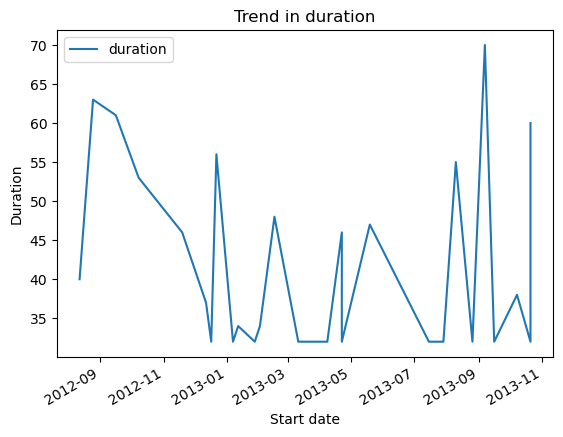

In [55]:
campaign_data.plot('start_date', 'duration')
_ = plt.xlabel("Start date")
_ = plt.ylabel("Duration")
_ = plt.title("Trend in duration")

plt.show()

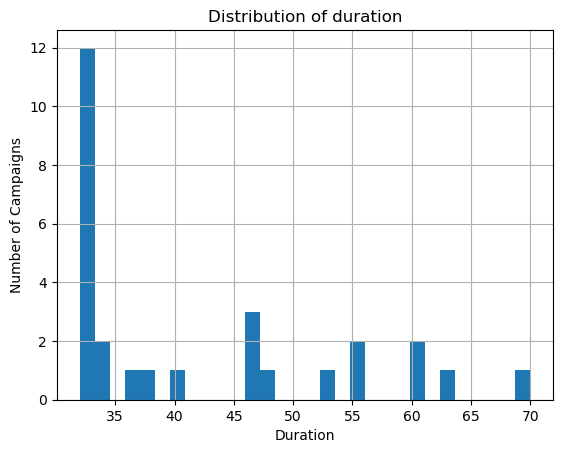

In [56]:
campaign_data.duration.hist(bins=30)
_ = plt.xlabel("Duration")
_ = plt.ylabel("Number of Campaigns")
_ = plt.title("Distribution of duration")
plt.show()

Below are the findings from the above plots
1. The duration of Campaigns in the initial days were longer
2. Later on, Campaigns with both short and long durations were started
3. Most of the campaigns fall in duration of 35 and less days
4. There is one Campaign with duration of 70 days

## Customer's Information

In [57]:
customer_data = pd.read_csv('Data\customer_demographics.csv')
customer_data.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [58]:
customer_info = trainset.merge(customer_data, how='left', on='customer_id')


In [59]:
print(customer_info.columns)


Index(['campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')


In [60]:
customer_info['info_available'] = customer_info['family_size'].notna()
customer_info.head()

,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,info_available
0,13,27,1053,0,46-55,NaN,0.0,1,NaN,5.0,True
1,13,116,48,0,36-45,Married,0.0,2,NaN,3.0,True
2,9,635,205,0,46-55,Married,0.0,2,NaN,7.0,True
3,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,8,1017,1489,0,46-55,Married,0.0,2,NaN,3.0,True


In [61]:
group_by_available = customer_info.groupby('info_available').agg({'customer_id': 'nunique', 'redemption_status': 'sum'})
group_by_available.columns = ['customers', 'redeemed']
group_by_available = group_by_available.reset_index()
group_by_available

,info_available,customers,redeemed
0,False,725,161
1,True,703,568


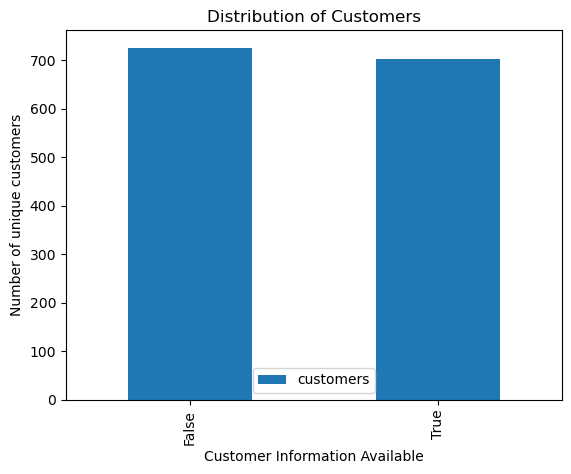

In [62]:
group_by_available.plot('info_available', 'customers', kind='bar')
_ = plt.xlabel('Customer Information Available')
_ = plt.ylabel('Number of unique customers')
_ = plt.title('Distribution of Customers')
plt.show()

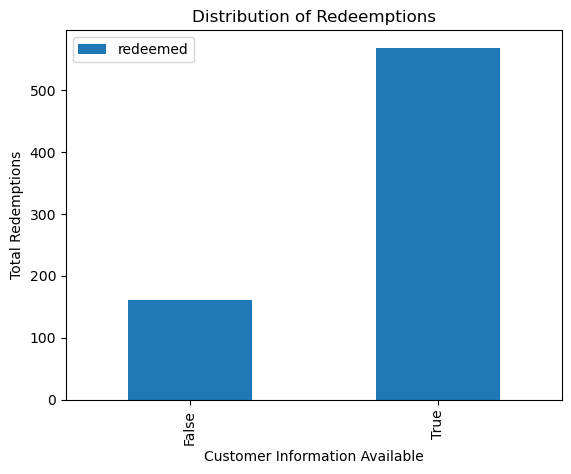

In [63]:
group_by_available.plot('info_available', 'redeemed', kind='bar')
_ = plt.xlabel('Customer Information Available')
_ = plt.ylabel('Total Redemptions')
_ = plt.title('Distribution of Redeemptions')
plt.show()

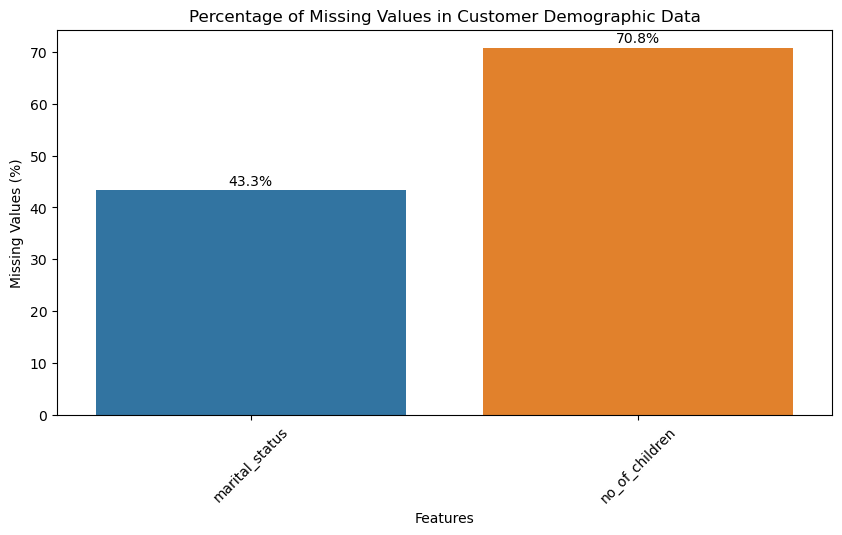

In [64]:

missing_percentage = (customer_data.isnull().sum() / len(customer_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Keep only columns with missing values

missing_df = missing_percentage.reset_index()
missing_df.columns = ["Feature", "Missing_Percentage"]

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_df, x="Feature", y="Missing_Percentage")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values in Customer Demographic Data")

# Display percentage values on top of bars
for index, row in missing_df.iterrows():
    plt.text(index, row["Missing_Percentage"] + 1, f"{row['Missing_Percentage']:.1f}%", ha="center", fontsize=10)

plt.show()


Below are the findings from the above plots
1. Almost 50% of customer's information is not available
2. Customer's whose information is available tends to redeem more coupons than customer's with no information

## Customer transactions

In [65]:
transaction_data = pd.read_csv('Data\customer_transaction_data.csv', parse_dates=['date'])
transaction_data['month'] = transaction_data.date.dt.month + transaction_data.date.dt.year.replace({2012: 0, 2013: 12})
transaction_data['coupon_discount'] = transaction_data['coupon_discount'] < 0
transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,month
0,2012-01-02,1501,26830,1,35.26,-10.69,False,1
1,2012-01-02,1501,54253,1,53.43,-13.89,False,1
2,2012-01-02,1501,31962,1,106.50,-14.25,False,1
3,2012-01-02,1501,33647,1,67.32,0.00,False,1
4,2012-01-02,1501,48199,1,71.24,-28.14,False,1


In [66]:
group_by_date = transaction_data.groupby('month').agg({'customer_id': 'nunique', 'item_id': 'nunique', 'quantity': 'count', 'coupon_discount': 'sum'})
group_by_date.columns = ['customers', 'items', 'count', 'coupon_discount']
group_by_date = group_by_date.reset_index()
group_by_date.head()

,month,customers,items,count,coupon_discount
0,1,351,7432,12382,187
1,2,654,11482,25073,287
2,3,1050,16307,46730,476
3,4,1463,19801,68340,868
4,5,1444,20334,79093,923


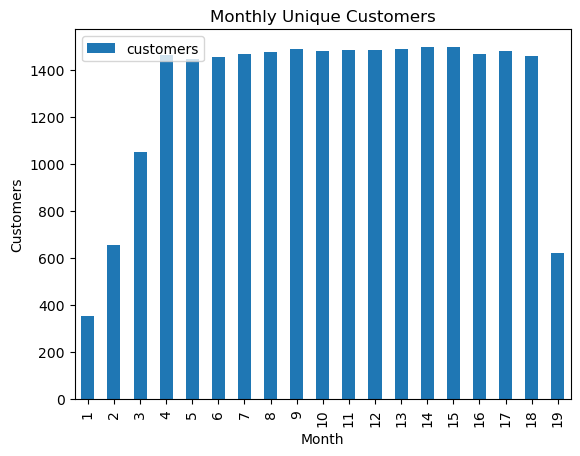

In [67]:
group_by_date.plot('month', 'customers', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Customers')
_ = plt.title('Monthly Unique Customers')
plt.show()

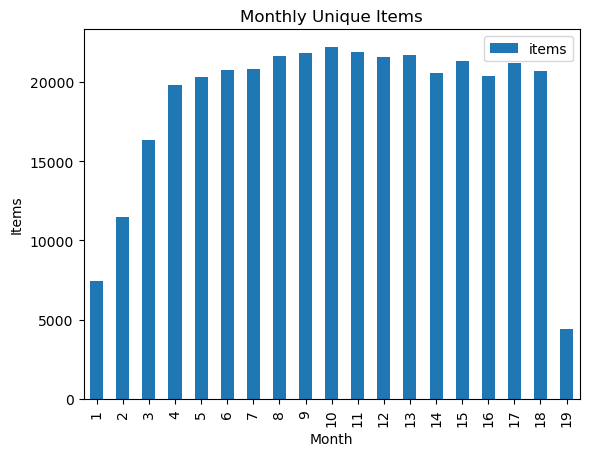

In [68]:
group_by_date.plot('month', 'items', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Items')
_ = plt.title('Monthly Unique Items')
plt.show()

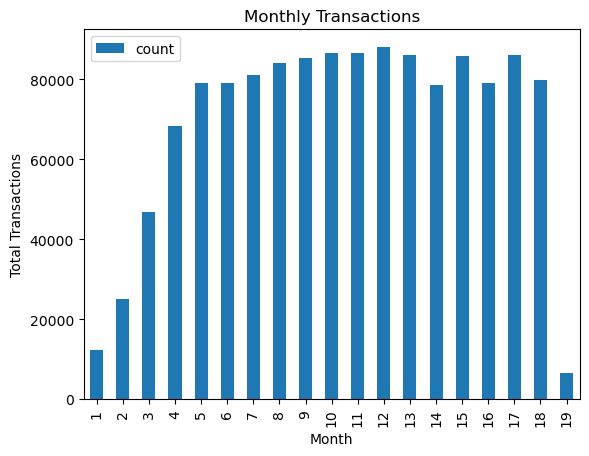

In [69]:
group_by_date.plot('month', 'count', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Total Transactions')
_ = plt.title('Monthly Transactions')
plt.show()

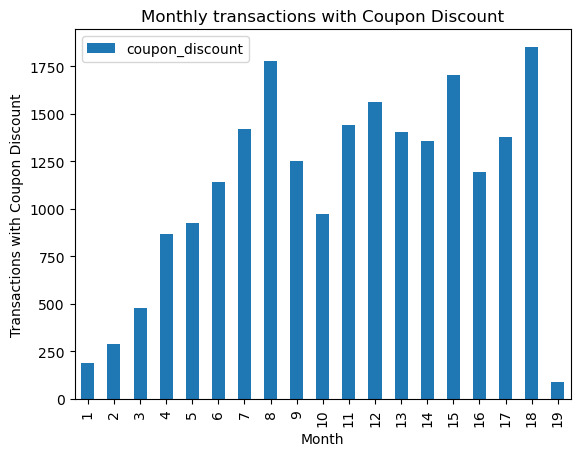

In [70]:
group_by_date.plot('month', 'coupon_discount', kind='bar')
_ = plt.xlabel('Month')
_ = plt.ylabel('Transactions with Coupon Discount')
_ = plt.title('Monthly transactions with Coupon Discount')
plt.show()

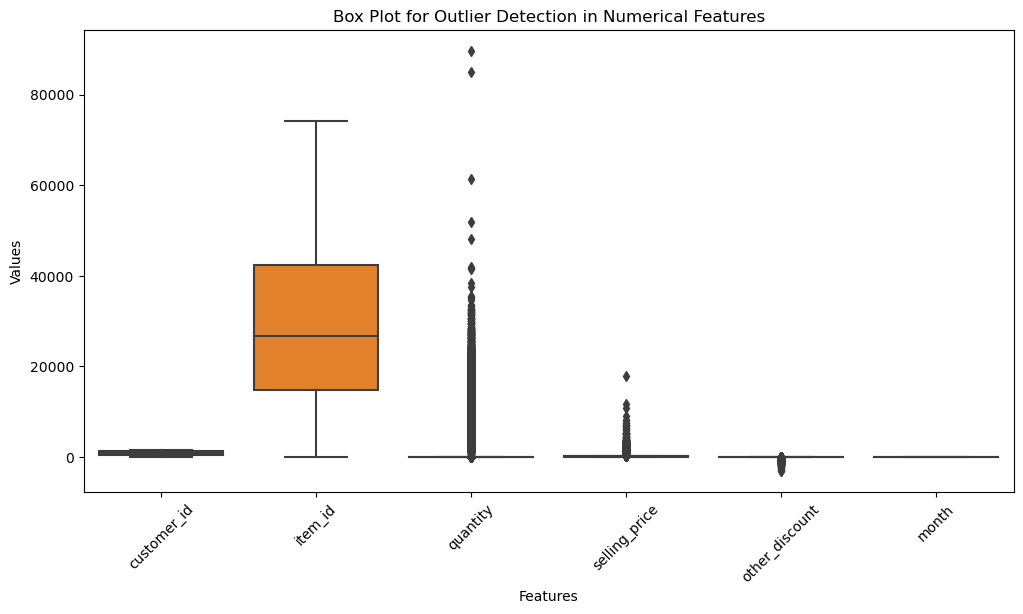

In [71]:
numerical_cols = transaction_data.select_dtypes(include=['number']).columns

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
sns.boxplot(data=transaction_data[numerical_cols])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Box Plot for Outlier Detection in Numerical Features")
plt.show()

Below are the findings from the above plots
1. There are not much transaction in the initial 3 months, may be client has just started its business
2. Month 19 can't be considered in any analysis because it only contains 3 days transactions
3. Customers, Items and total transactions grew in initial 3 months and then remains almost stable
4. Transactions with coupon discount has fluctuations

# Summary

1. 78% coupons were never redeemed by any customers
2. 85% customers has never redeemed any coupons
3. 0.93% campaign, coupon and customer combination has positive redemption status
4. The client started with longer Campaigns and later on introduced campaigns with 35 or less days
5. There is one Campaign with duration of 70 days
6. 50% Customer's information is not available
7. Customers with information redeems more coupons than customers without any information
8. Initial 3 months were starting phase for the Client
9. Customers, Items and total transactions remained stable after initial 3 months
10. Transactions with coupon discount has fluctuations